In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [108]:
file_path = 'data/AirQualityUCI.csv'
df = pd.read_csv(file_path, delimiter=';')
print(df.describe())
df.columns = df.columns.str.strip(' ;')
print(df.columns)

       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -20

In [109]:
df['Time'] = df['Time'].str.replace('.', ':')
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('datetime', inplace=True)
print(df.head())

                           Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT)  \
datetime                                                                  
2004-03-10 18:00:00  10/03/2004  18:00:00    2,6       1360.0     150.0   
2004-03-10 19:00:00  10/03/2004  19:00:00      2       1292.0     112.0   
2004-03-10 20:00:00  10/03/2004  20:00:00    2,2       1402.0      88.0   
2004-03-10 21:00:00  10/03/2004  21:00:00    2,2       1376.0      80.0   
2004-03-10 22:00:00  10/03/2004  22:00:00    1,6       1272.0      51.0   

                    C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
datetime                                                                      
2004-03-10 18:00:00     11,9         1046.0    166.0        1056.0    113.0   
2004-03-10 19:00:00      9,4          955.0    103.0        1174.0     92.0   
2004-03-10 20:00:00      9,0          939.0    131.0        1140.0    114.0   
2004-03-10 21:00:00      9,2          948.0    172.0        1092.0    122.0   


NaN values after cleaning: 0
Infinite values after cleaning: 0
Data range for 'CO(GT)': -200.0 to 11.9
                     CO(GT)
datetime                   
2004-03-10 18:00:00     2.6
2004-03-10 19:00:00     2.0
2004-03-10 20:00:00     2.2
2004-03-10 21:00:00     2.2
2004-03-10 22:00:00     1.6
2004-03-10 23:00:00     1.2
2004-03-11 00:00:00     1.2
2004-03-11 01:00:00     1.0
2004-03-11 02:00:00     0.9
2004-03-11 03:00:00     0.6
Data is clean, proceeding with decomposition.
Error during decomposition: Axis limits cannot be NaN or Inf


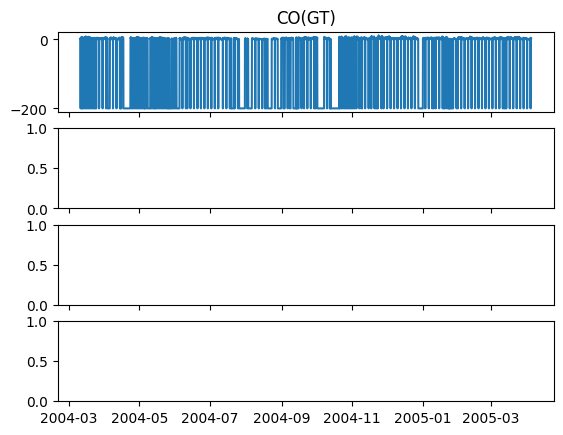

In [110]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')
df['CO(GT)'] = df['CO(GT)'].replace([np.inf, -np.inf], np.nan)
df['CO(GT)'] = df['CO(GT)'].ffill().bfill()
df = df.dropna(subset=['CO(GT)'])
print(f"NaN values after cleaning: {df['CO(GT)'].isnull().sum()}")
print(f"Infinite values after cleaning: {np.isinf(df['CO(GT)']).sum()}")
print(f"Data range for 'CO(GT)': {df['CO(GT)'].min()} to {df['CO(GT)'].max()}")
print(df[['CO(GT)']].head(10))
if df['CO(GT)'].isnull().sum() == 0 and np.isinf(df['CO(GT)']).sum() == 0:
    print("Data is clean, proceeding with decomposition.")

    try:
        decomposition = sm.tsa.seasonal_decompose(df['CO(GT)'], model='additive', period=12)
        decomposition.plot()
        plt.show()
    except ValueError as e:
        print(f"Error during decomposition: {e}")
else:
    print("Data still contains NaN or Inf values. Cannot proceed with decomposition.")